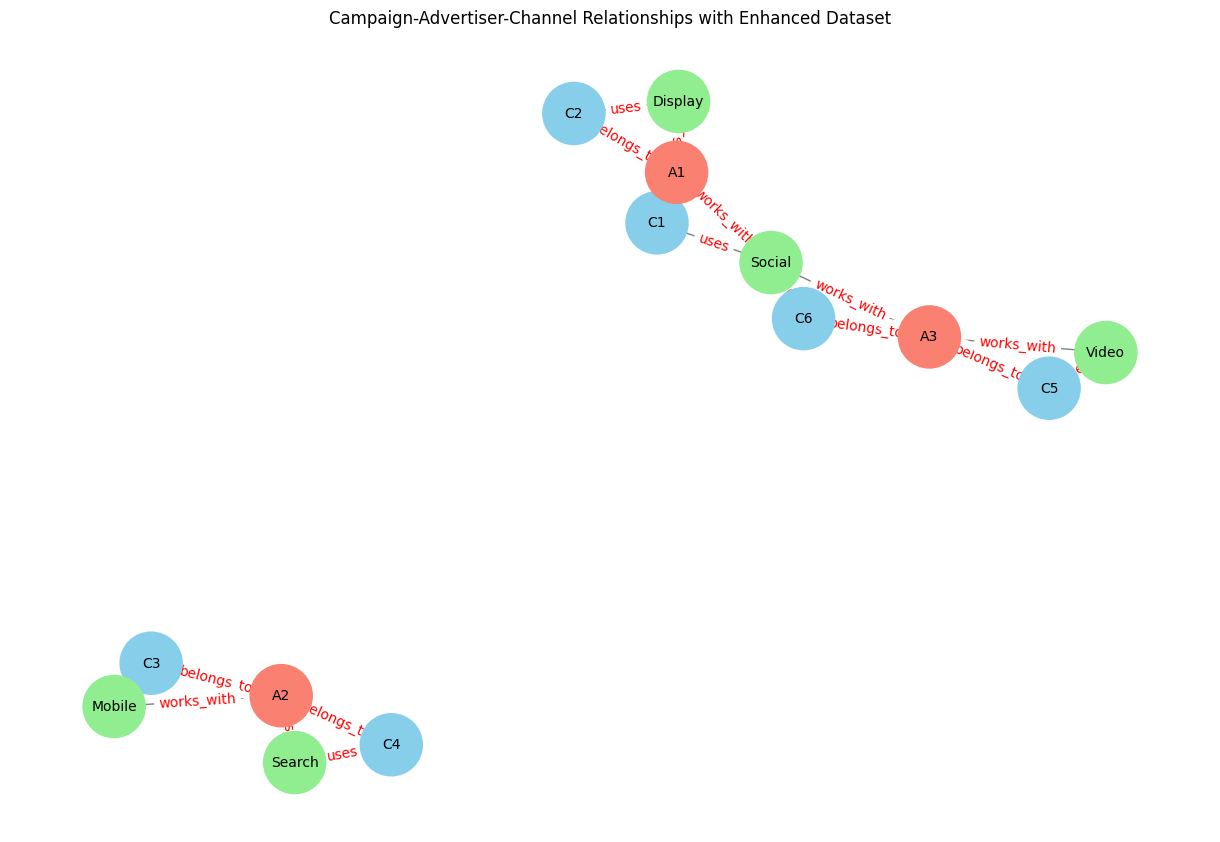

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data with more records and additional features
data = [
    {"campaign_id": "C1", "advertiser_id": "A1", "channel_name": "Social", "campaign_budget_usd": 500, "clicks": 100},
    {"campaign_id": "C2", "advertiser_id": "A1", "channel_name": "Display", "campaign_budget_usd": 700, "clicks": 200},
    {"campaign_id": "C3", "advertiser_id": "A2", "channel_name": "Mobile", "campaign_budget_usd": 300, "clicks": 80},
    {"campaign_id": "C4", "advertiser_id": "A2", "channel_name": "Search", "campaign_budget_usd": 900, "clicks": 150},
    {"campaign_id": "C5", "advertiser_id": "A3", "channel_name": "Video", "campaign_budget_usd": 600, "clicks": 120},
    {"campaign_id": "C6", "advertiser_id": "A3", "channel_name": "Social", "campaign_budget_usd": 400, "clicks": 90},
]

# Create an empty graph
G = nx.Graph()

# Add nodes and edges based on relationships in each row
for row in data:
    campaign_id = row["campaign_id"]
    advertiser_id = row["advertiser_id"]
    channel_name = row["channel_name"]

    # Add nodes for each entity type (campaign, advertiser, channel)
    G.add_node(campaign_id, entity="campaign", budget=row["campaign_budget_usd"], clicks=row["clicks"])
    G.add_node(advertiser_id, entity="advertiser")
    G.add_node(channel_name, entity="channel")

    # Add edges to represent relationships
    G.add_edge(campaign_id, advertiser_id, relationship="belongs_to")
    G.add_edge(campaign_id, channel_name, relationship="uses")
    G.add_edge(advertiser_id, channel_name, relationship="works_with")

# Set node colors based on entity type
color_map = []
for node in G.nodes(data=True):
    if node[1]["entity"] == "campaign":
        color_map.append("skyblue")
    elif node[1]["entity"] == "advertiser":
        color_map.append("salmon")
    elif node[1]["entity"] == "channel":
        color_map.append("lightgreen")

# Define edge labels for relationships
edge_labels = {}
for row in data:
    edge_labels[(row["campaign_id"], row["advertiser_id"])] = "belongs_to"
    edge_labels[(row["campaign_id"], row["channel_name"])] = "uses"
    edge_labels[(row["advertiser_id"], row["channel_name"])] = "works_with"

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for spacing
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=2000, font_size=10, font_color="black", edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plt.title("Campaign-Advertiser-Channel Relationships with Enhanced Dataset")
plt.show()
